In [1]:
# notebook to visualize image transforms for multimodal saycam

import sys
import argparse
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl

from multimodal_saycam.data.base_data_module import BaseDataModule, load_and_print_info
from multimodal_saycam.data.multimodal_data_module import MultiModalSAYCamDataModule
from multimodal_saycam.models.multimodal_cnn_embedding import MultiModalCNNEmbedding
from multimodal_saycam.lit_models.multimodal import MultiModalLitModel

# set up auto reload
%load_ext autoreload
%autoreload 2

In [26]:
def _setup_parser():
    """Set up Python's ArgumentParser with data, model, trainer, and other arguments."""
    parser = argparse.ArgumentParser()

    # add trainer specific arguments
    trainer_parser = pl.Trainer.add_argparse_args(parser)
    trainer_parser._action_groups[1].title = "Trainer Args"  # pylint: disable=protected-access
    parser = argparse.ArgumentParser(add_help=False, parents=[trainer_parser])

    # get data, model and litmodel specific arguments
    data_group = parser.add_argument_group("Data Args")
    MultiModalSAYCamDataModule.add_to_argparse(data_group)

    model_group = parser.add_argument_group("Model Args")
    MultiModalCNNEmbedding.add_to_argparse(model_group)

    lit_model_group = parser.add_argument_group("LitModel Args")
    MultiModalLitModel.add_to_argparse(lit_model_group)

    return parser

# set random seed
# pl.seed_everything(0)

sys.argv = ['', '--limit_train_batches', '1000']
parser = _setup_parser()
# parser = argparse.ArgumentParser()
args = parser.parse_args()

print(args)

mm = MultiModalSAYCamDataModule(args)
mm.prepare_data()
mm.setup()
# mm_loader = torch.utils.data.DataLoader(mm.train_dataset, shuffle=False, batch_size=128)
mm_loader = mm.train_dataloader()
print(len(mm_loader))

# get batch
# transformed_imgs, imgs, utterances, utterances_len = next(iter(mm_loader))
for i, batch in enumerate(mm_loader):
    a, b, c, d = batch
    
    if i == 50:
        break

Namespace(accelerator=None, accumulate_grad_batches=1, amp_backend='native', amp_level='O2', augment_frames=False, auto_lr_find=False, auto_scale_batch_size=False, auto_select_gpus=False, automatic_optimization=True, batch_size=4, benchmark=False, check_val_every_n_epoch=1, checkpoint_callback=True, default_root_dir=None, deterministic=False, distributed_backend=None, embedding_dim=128, fast_dev_run=False, finetune_cnn=False, flush_logs_every_n_steps=100, gpus=<function _gpus_arg_default at 0x7f554aa27820>, gradient_clip_val=0, input_dim=10000, limit_test_batches=1.0, limit_train_batches=1000, limit_val_batches=1.0, log_every_n_steps=50, log_gpu_memory=None, logger=True, lr=0.0003, max_epochs=1000, max_steps=None, min_epochs=1, min_steps=None, num_nodes=1, num_processes=1, num_sanity_val_steps=2, num_workers=0, overfit_batches=0.0, precision=32, prepare_data_per_node=True, pretrained_cnn=False, process_position=0, profiler=None, progress_bar_refresh_rate=1, reload_dataloaders_every_epo

In [7]:
# inverse normalization step
from torchvision import transforms
n_inv = transforms.Normalize([-0.485/0.229, -0.546/0.224, -0.406/0.225], [1/0.229, 1/0.224, 1/0.225])

# apply transforms
imgs = n_inv(imgs)
transformed_imgs = n_inv(transformed_imgs)

Namespace(accelerator=None, accumulate_grad_batches=1, amp_backend='native', amp_level='O2', augment_frames=False, auto_lr_find=False, auto_scale_batch_size=False, auto_select_gpus=False, automatic_optimization=True, batch_size=4, benchmark=False, check_val_every_n_epoch=1, checkpoint_callback=True, default_root_dir=None, deterministic=False, distributed_backend=None, embedding_dim=128, fast_dev_run=False, finetune_cnn=False, flush_logs_every_n_steps=100, gpus=<function _gpus_arg_default at 0x7fab89d68820>, gradient_clip_val=0, input_dim=10000, limit_test_batches=1.0, limit_train_batches=1.0, limit_val_batches=1.0, log_every_n_steps=50, log_gpu_memory=None, logger=True, lr=0.0003, max_epochs=1000, max_steps=None, min_epochs=1, min_steps=None, num_nodes=1, num_processes=1, num_sanity_val_steps=2, num_workers=0, overfit_batches=0.0, precision=32, prepare_data_per_node=True, pretrained_cnn=False, process_position=0, profiler=None, progress_bar_refresh_rate=1, reload_dataloaders_every_epoc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


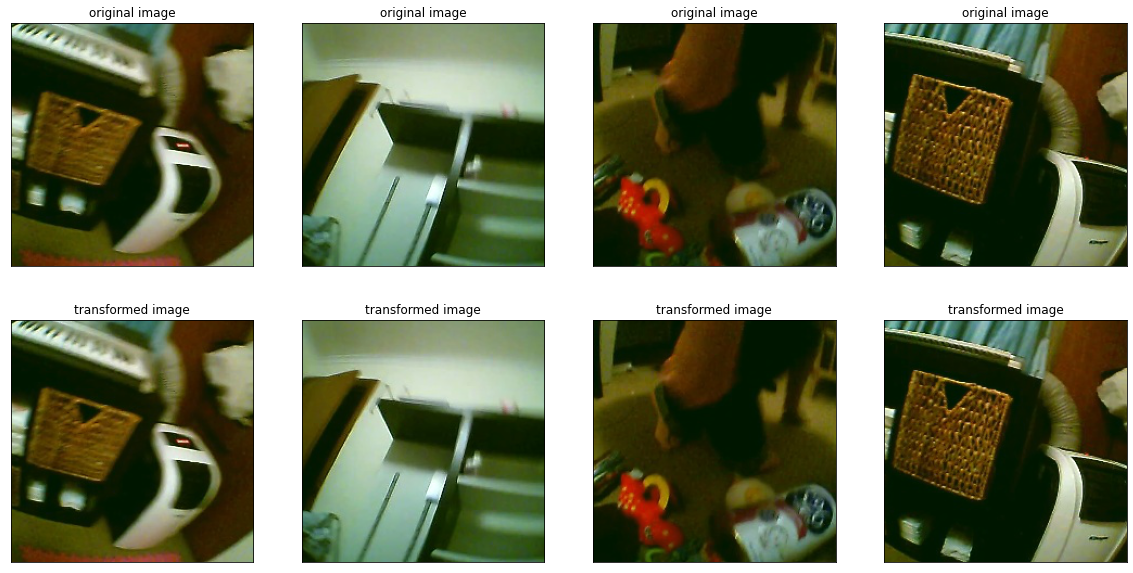

In [3]:
# extract first image from each batch
plt.figure(figsize=(20, 10))
for i in range(4):
    img = imgs[i].permute((1, 2, 0))
    transformed_img = transformed_imgs[i].permute((1, 2, 0))

    plt.subplot(2, 4, i+1)
    plt.imshow(img.detach().numpy())
    plt.title('original image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 4, i+5)
    plt.imshow(transformed_img.detach().numpy())
    plt.title('transformed image')
    plt.xticks([])
    plt.yticks([])